In [1]:
import random
import matplotlib.pyplot as plt
import math

import alignments as alg
import utils

In [2]:
human = utils.read_protein('data/alg_HumanEyelessProtein.txt')
fly = utils.read_protein('data/alg_FruitflyEyelessProtein.txt')
#print(len(human))
#print(len(fly))
scoring_matrix = utils.read_scoring_matrix('data/alg_PAM50.txt')
alignment_matrix = alg.compute_alignment_matrix(human, fly, scoring_matrix, False)

score, align_human, align_fly = alg.compute_local_alignment(human, fly, scoring_matrix, alignment_matrix)
print("Local alignment score: " + str(score))
print("Local alignment of human protein: " + align_human)
print("Local alignment of fly protein: " + align_fly)

Local alignment score: 875
Local alignment of human protein: HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
Local alignment of fly protein: HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


In [3]:
def remove_dash(align):
    new_align = ""
    for char in align:
        if char != '-':
            new_align += char
    return new_align

def match_percent(align1, align2):
    matches = 0
    length = len(align2)
    for i in range(length):
        if align1[i] == align2[i]:
            matches += 1
    return (matches / float(length))

In [4]:
consensus = utils.read_protein('data/alg_ConsensusPAXDomain.txt')

new_align_human = remove_dash(align_human)
new_align_fly = remove_dash(align_fly)

align_matrix_human_pac = alg.compute_alignment_matrix(new_align_human, consensus, scoring_matrix, True)
align_matrix_fly_pac = alg.compute_alignment_matrix(new_align_fly, consensus, scoring_matrix, True)

aligns_human_pac = alg.compute_global_alignment(new_align_human, consensus, scoring_matrix, align_matrix_human_pac)
aligns_fly_pac = alg.compute_global_alignment(new_align_fly, consensus, scoring_matrix, align_matrix_fly_pac)

percent_human_pac = match_percent(aligns_human_pac[1], aligns_human_pac[2]) * 100.
percent_fly_pac = match_percent(aligns_fly_pac[1], aligns_fly_pac[2]) * 100.

print("Percentage of elements that agree between human and consensus: %.1f%%" % percent_human_pac)
print("Percentage of elements that agree between fly and consensus: %.1f%%" % percent_fly_pac)

# These similarities cannot be due to chance. Indeed, each of
# these two global alignments agree on over 90 elments among
# over 130 elements. If the alphabet contains 23 characters,
# then the chance of matching over 90 elements would be extremely small.

Percentage of elements that agree between human and consensus: 72.9%
Percentage of elements that agree between fly and consensus: 70.1%


In [5]:
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials):
    distribution = {}
    
    for trial in range(num_trials):
        # convert the string seq_y into a list
        rand_y = list(seq_y)
        # shuffle it
        random.shuffle(rand_y)
        # convert it back into a string
        rand_y = "".join(rand_y)
        
        alignment_matrix = alg.compute_alignment_matrix(seq_x, rand_y, scoring_matrix, False)
        score, _, _ = alg.compute_local_alignment(seq_x, rand_y, scoring_matrix, alignment_matrix)
        if score in distribution:
            distribution[score] += 1
        else:
            distribution[score] = 1
            
    return distribution

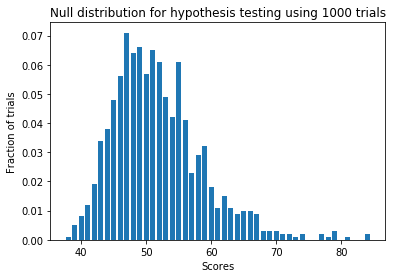

In [6]:
distribution = generate_null_distribution(human, fly, scoring_matrix, 1000)
X = []
Y = []
for score in distribution:
    X.append(score)
    Y.append(distribution[score] / 1000.)
    
plt.bar(X, Y)
plt.xlabel("Scores")
plt.ylabel("Fraction of trials")
plt.title("Null distribution for hypothesis testing using 1000 trials")
plt.show()

In [7]:
total = 0
for score in distribution:
    total += score * distribution[score]
mean = total / 1000.
print("mean = %f" % mean)

total_square = 0
for score in distribution:
    total_square += distribution[score] * (score - mean) ** 2
var = total_square / 1000.
std = math.sqrt(var)
print("standard deviation = %f" % std)

z_score = (875 - mean) / std
print("z-score = %f" % z_score)

# We can see that the shape of the distribution is quite
# clost to a bell-shaped distribution, thus we can consider
# that 99% of the scores are within 3 standard deviations
# away from the mean. On the other hand, the z-score shows
# that the score between human and fly is more than 100
# standard deviations away from the mean, which means this
# score, resulting from the local alignment of the HumanEyelessProtein 
# and the FruitflyEyelessProtein, is not a lucky strike.

mean = 51.799000
standard deviation = 6.909312
z-score = 119.143692
